In [1]:
import os

In [2]:
import cv2
import numpy as np
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt

In [3]:
import gdal

In [4]:
import rasterio

In [5]:
from glob import glob

In [6]:
ndvi_path = os.getcwd() + "\\ndvi_images"

In [7]:
print(os.path.exists(ndvi_path))

True


In [8]:
ndvi_images = glob(ndvi_path + "\\*.tif")

In [9]:
for scene in ndvi_images:
    print(scene)

C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Godavari20180225.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Godavari20190215.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Krishna20170210.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Krishna20180302.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Krishna20190210.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Krishna20200215.tif


In [10]:
def saveImage(src, savePath, arr):
    with rasterio.Env():
        profile = src.profile
        profile.update(
            dtype=rasterio.float64,
            count=1)
        with rasterio.open(savePath, 'w', **profile) as dst:
            dst.write(arr.astype(rasterio.float64), 1)

In [11]:
def imMap(date, img):
    ep.plot_bands(img, 
        cmap='Spectral',
        scale=False,
        title=date)
    plt.show()

In [12]:
def hist(date, img):
    ep.hist(img,
            figsize=(12, 6),
            title=[date])
    plt.show()

In [13]:
def filterImage(ndvi_image, ndvi, lower, upper):
    condition = (ndvi > lower)
    ndvi_cond = np.where(condition == 0, np.nan, ndvi)
    condition = (ndvi <= upper)
    ndvi_cond = np.where(condition == 0, np.nan, ndvi_cond)
    area = np.count_nonzero(ndvi_cond != np.nan)
    print("Pixels with NDVI > ", lower, " and <= ", upper, " = ", area)
    print("Land area with NDVI > ", lower, " and <= ", upper, " = ", area / 100, " hectares")
    #saveImage(ndvi_image, savePath, ndvi_cond)
    imMap(str(lower)+"-"+str(upper), ndvi_cond)
    return ndvi_cond

In [14]:
scene = ndvi_images[-1]
with rasterio.open(scene) as src:
    ndvi = src.read()
print(type(ndvi))

<class 'numpy.ndarray'>


In [15]:
ndvi = ndvi.reshape(ndvi.shape[0]*ndvi.shape[1], ndvi.shape[2])
ndvi.shape

(11197, 12427)

In [16]:
ndvi = ndvi * 10000

In [17]:
#ndvi = np.where(np.isnan(ndvi), -1.1, ndvi)

In [18]:
edges = cv2.Canny(ndvi.astype(np.uint8),100,200)

In [19]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

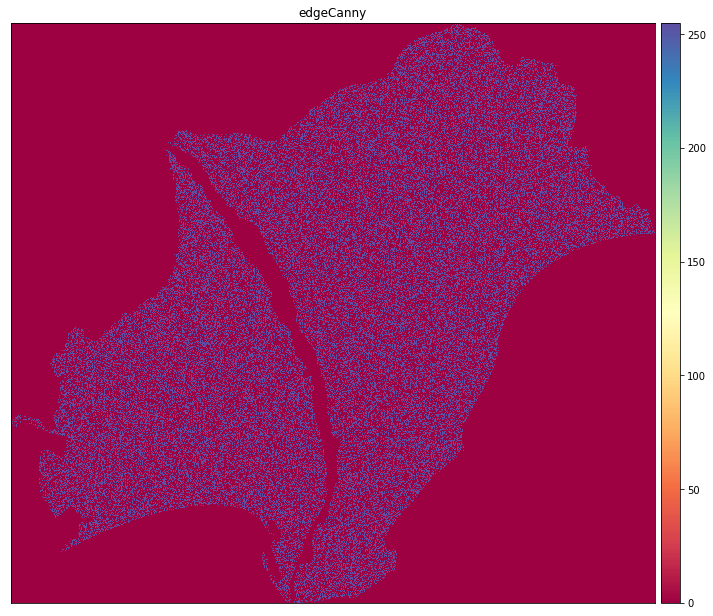

In [27]:
imMap("edgeCanny", edges)

In [21]:
laplacian = cv2.Laplacian(ndvi,cv2.CV_64F)

In [22]:
laplacian

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

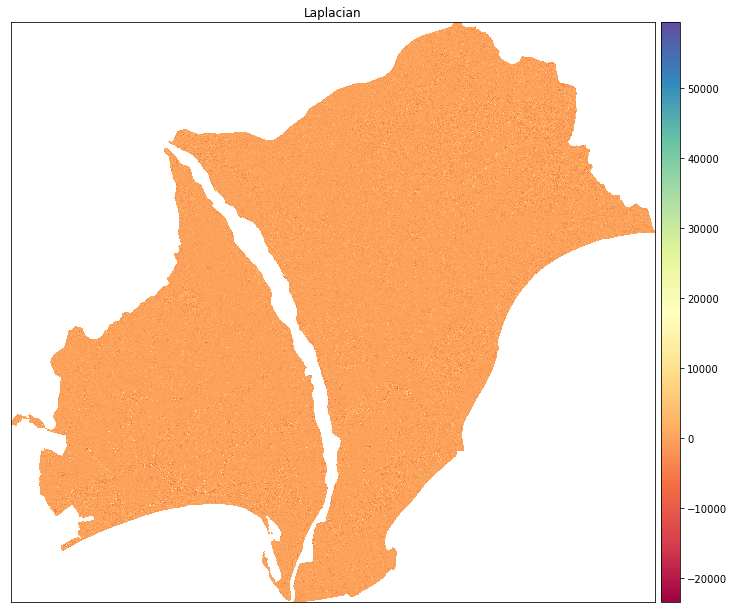

In [28]:
imMap("Laplacian", laplacian)

In [24]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

In [25]:
auto = auto_canny(ndvi.astype(np.uint8))

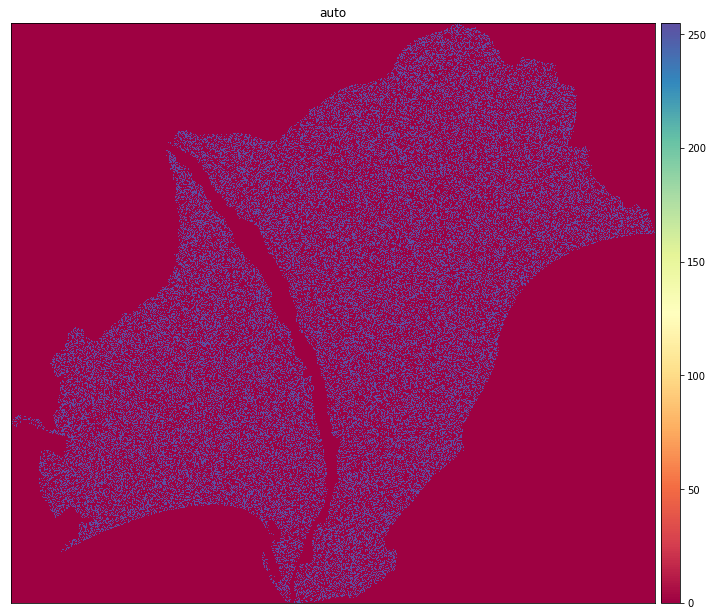

In [26]:
imMap("auto", auto)

In [29]:
sobelx = cv2.Sobel(ndvi,cv2.CV_64F,1,1,ksize=5)


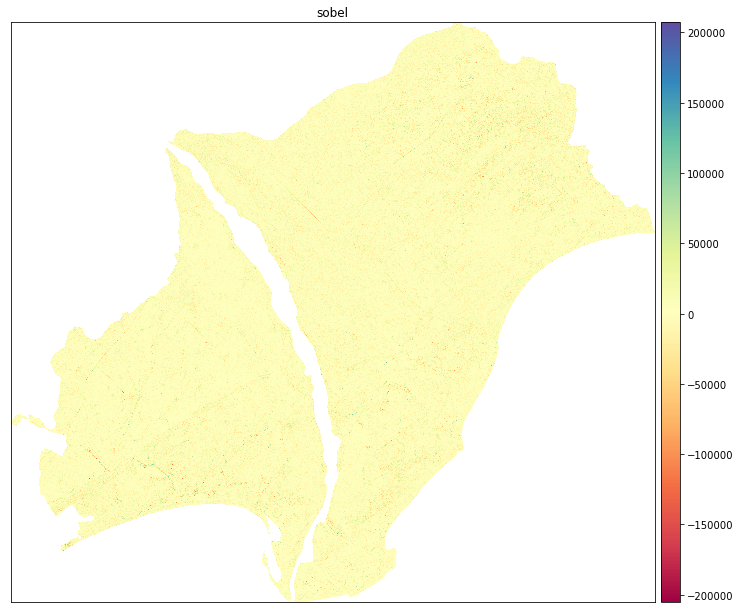

In [30]:
imMap("sobel", sobelx)